In [1]:
import numpy as np
import pandas as pd

In [2]:
IP_train_data = pd.read_csv('train.csv')
IP_test_data = pd.read_csv('test.csv')

In [3]:
IP_train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
IP_train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
# training data
dum_train_data= IP_train_data.apply(lambda x : x.fillna(x.value_counts().index[0]))

#testing data
dum_test_data= IP_test_data.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [6]:
 dum_train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [7]:
dum_train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [8]:
# get the categorical columns
cat_cols = dum_train_data.select_dtypes(['object']).columns

#cat to num for training data
dum_train_data[cat_cols] = dum_train_data[cat_cols].apply(lambda x: pd.factorize(x)[0])

#cat to num for testing data
dum_test_data[cat_cols] = dum_test_data[cat_cols].apply(lambda x: pd.factorize(x)[0])

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

#splitting between Xtrain Ytrain from training data with oversampling
Xtrain = dum_train_data.drop(['employee_id', 'recruitment_channel','region','is_promoted'], axis=1)
Ytrain = dum_train_data['is_promoted']

Xresam , yresam = over_sampler.fit_resample(Xtrain,Ytrain)

Xtes = dum_test_data.drop(['employee_id', 'recruitment_channel','region'], axis=1)

In [9]:
Xresam['education'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
Xtes.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0,0,0,1,24,3.0,1,0,77
1,1,0,1,1,31,3.0,5,0,51
2,2,0,0,1,31,1.0,4,0,47
3,3,0,1,3,31,2.0,9,0,65
4,4,0,0,1,30,4.0,7,0,61


In [11]:
#splitting training data into training and validation.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(Xresam, yresam, test_size = 0.2, random_state = 2)


#normalization of data in 0-1
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
Xtr_norm = sc_x.fit_transform(X_train)
X_validation = sc_x.fit_transform(X_valid)
Xte_norm = sc_x.fit_transform(Xtes)


In [33]:
#use decision tree to classify the result
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

HR_model = DecisionTreeClassifier()
HR_model.fit(Xtr_norm, y_train)

# predection for confusion matrix
y_pred_for_validation = HR_model.predict(X_validation)

#getting confusion matrix

My_conf_metrics = confusion_matrix(y_valid, y_pred_for_validation)


In [34]:
My_conf_metrics

array([[9230,  910],
       [  18, 9898]], dtype=int64)

<AxesSubplot:>

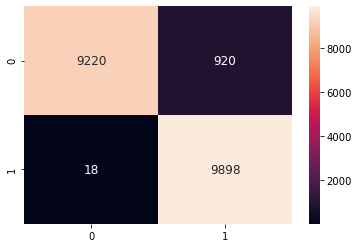

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#corr_mtrtix = input_train_df.corr().round(2)
sns.heatmap(My_conf_metrics, annot = True,annot_kws={'size': 12},  fmt = '.8g')

In [15]:
metrics.accuracy_score(y_valid, y_pred_for_validation)

0.9532309533306741

In [16]:
print("shape of XTRAIN :", X_train.shape)

shape of XTRAIN : (80224, 9)


In [17]:
80224* 0.20

16044.800000000001

In [39]:
# predection for confusion matrix on test data
y_pred_for_testdata = HR_model.predict(Xtes.values)

predicted_ispromoted = pd.DataFrame(y_pred_for_testdata)
predicted_ispromoted.value_counts()

1    22405
0     1085
dtype: int64